# Watershed Algorithm

- 이미지를 Grayscale로 변환하면 각 Pixel의 값(0 ~255)은 높고 낮음으로 구분할 수 있음

- 이것을 지형의 높낮이로 가정하고 높은 부분을 봉우리, 낮은 부분을 계곡이라고 표현할 수 있음

- 바로 그 경계선을 이미지의 구분지점으로 파악하여 이미지 분할을 하게 됨

- 방법

  1. 이미지를 grayscale로 변환

  2.  morphology를 이용하여 이미지의 노이즈나 hole을 제거

  3. 전경과 배경을 구분

    - 전경은 opening한 결과에 거리 변환함수를 적용. 
    
    - 거리변환 함수를 적용하면 중심으로 부터 skeloton image를 얻을 수 있음.
    
    - 즉, 중심으로 부터 점점 옅어져가는 영상을 파악할 수 있음. 
    
    - 그 결과에 threshold를 적용하여 확실한 전경을 찾아낸다.

  4. 확실하지 않은 영역을 파악.  
    이전에 구한 배경에서 전경을 뺀 영역

  5. 전경에 labelling 작업.  
    labelling은 서로 이어져 있는 부분에 라벨을 붙여 서로 동일한 객체라는 것을 구분하기 위함.

- `cv2.watershed()`

- http://www.cmm.mines-paristech.fr/~beucher/wtshed.html

- 이미지
  - [image] - 'watershed_coins.jpg'


## watershed algorithm 예제 1

- Contour Detection 방식

In [ ]:
sep_coins = cv2.imread("/path/to/your/image")

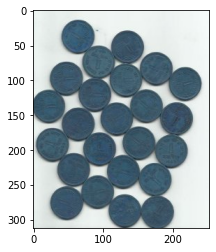

In [ ]:
plt.imshow(sep_coins)
plt.show()

In [ ]:
gray = cv2.cvtColor(sep_coins, cv2.COLOR_BGR2GRAY)

In [ ]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

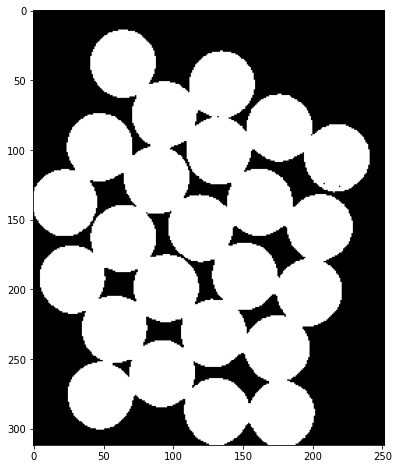

In [ ]:
plt.figure(figsize=(12, 8))
plt.imshow(thresh, 'gray')
plt.show()

In [ ]:
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 4)

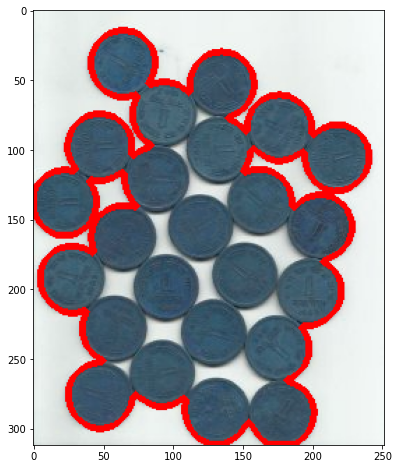

In [ ]:
plt.figure(figsize=(12, 8))
plt.imshow(sep_coins)
plt.show()

- 성능 높이기

In [ ]:
sep_coins = cv2.imread("/content/watershed_coins.jpg")

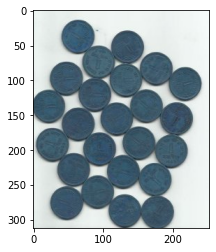

In [ ]:
plt.imshow(sep_coins)
plt.show()

In [ ]:
gray = cv2.cvtColor(sep_coins, cv2.COLOR_BGR2GRAY)

In [ ]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [ ]:
kernel = np.ones((3, 3), np.uint8)

In [ ]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [ ]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

In [ ]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

In [ ]:
unknown = cv2.subtract(sure_bg, sure_fg)

In [ ]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

In [ ]:
markers = cv2.watershed(sep_coins, markers)
sep_coins[markers == -1] = [255, 0, 0]

- 위 과정을 시각화

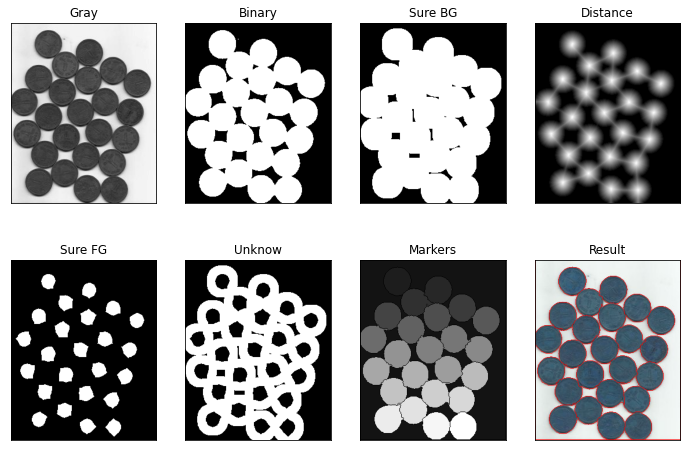

In [ ]:
images = [gray, thresh, sure_bg, dist_transform, sure_fg, unknown, markers, sep_coins]
titles = ['Gray',
          'Binary',
          'Sure BG',
          'Distance',
          'Sure FG',
          'Unknow',
          'Markers',
          'Result']

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

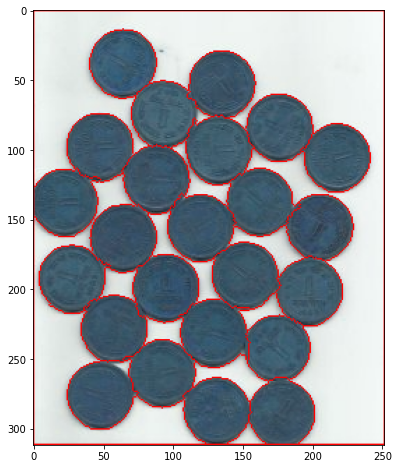

In [ ]:
plt.figure(figsize=(12, 8))
plt.imshow(sep_coins, 'gray')
plt.show()